In [1]:
# Create Latitude and Longitude Combinations

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy


In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hithadhoo mv
port alfred za
mataura pf
bilma ne
mount gambier au
illoqqortoormiut gl
port alfred za
ponta do sol cv
punta arenas cl
airai pw
barentsburg sj
saint george bm
cowra au
rovaniemi fi
atuona pf
cape town za
punta arenas cl
kenai us
longyearbyen sj
bluff nz
marsh harbour bs
bambous virieux mu
atuona pf
west bay ky
rikitea pf
mataura pf
dikson ru
ondorhaan mn
albany au
mataura pf
atuona pf
alofi nu
mahebourg mu
busselton au
gat ly
new norfolk au
morehead pg
upernavik gl
avarua ck
puerto ayora ec
norman wells ca
kidal ml
manokwari id
mataura pf
ushuaia ar
hilo us
ulfborg dk
rikitea pf
port alfred za
busselton au
takayama jp
bubaque gw
santa maria da vitoria br
punta arenas cl
kavieng pg
punta arenas cl
ilulissat gl
oranjestad aw
east london za
hilo us
tasiilaq gl
tommot ru
amderma ru
pisco pe
tasiilaq gl
novoselytsya ua
yelan ru
aklavik ca
avarua ck
broome au
hermanus za
bluff nz
puerto ayora ec
coolum beach au
kaabong ug
khatanga ru
avarua ck
saskylakh ru
vaini to
airai pw
sain

barentsburg sj
rikitea pf
agua buena pa
neiafu to
deputatskiy ru
rabo de peixe pt
rikitea pf
butaritari ki
mount gambier au
saskylakh ru
saskylakh ru
tokmak kg
buin pg
port alfred za
albany au
mitchell us
barentsburg sj
lompoc us
albany au
georgetown sh
busselton au
hermanus za
hualmay pe
bethel us
castro cl
qaanaaq gl
luderitz na
mataura pf
longyearbyen sj
faya td
tuktoyaktuk ca
nome us
rikitea pf
atuona pf
sorvag fo
carauari br
mar del plata ar
vaini to
leningradskiy ru
kihei us
santa lucia es
atuona pf
hilo us
udachnyy ru
punta arenas cl
hare bay ca
port blair in
hilo us
rikitea pf
qaqortoq gl
georgetown sh
port alfred za
taolanaro mg
rikitea pf
victoria sc
calbe de
harper lr
hilo us
kuusamo fi
ranong th
rikitea pf
belushya guba ru
mount isa au
nanortalik gl
astana kz
cape town za
rikitea pf
kapaa us
richards bay za
kashi cn
blythe us
cape town za
anito ph
arraial do cabo br
nanortalik gl
port elizabeth za
bluff nz
sur om
mys shmidta ru
lazarev ru
port alfred za
harper lr
jamestown 

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [27]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [28]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | hithadhoo
Processing Record 2 of Set 12 | port alfred
Processing Record 3 of Set 12 | mataura
Processing Record 4 of Set 12 | bilma
Processing Record 5 of Set 12 | mount gambier
Processing Record 6 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 12 | ponta do sol
Processing Record 8 of Set 12 | punta arenas
Processing Record 9 of Set 12 | airai
Processing Record 10 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 12 | saint george
Processing Record 12 of Set 12 | cowra
Processing Record 13 of Set 12 | rovaniemi
Processing Record 14 of Set 12 | atuona
Processing Record 15 of Set 12 | cape town
Processing Record 16 of Set 12 | kenai
Processing Record 17 of Set 12 | longyearbyen
Processing Record 18 of Set 12 | bluff
Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | bambous virieux
Processing Record 21 of Set 12 | west bay
Processing Record 22 of Set 12 | rikite

Processing Record 33 of Set 15 | timberlake
Processing Record 34 of Set 15 | kaitangata
Processing Record 35 of Set 15 | lorengau
Processing Record 36 of Set 15 | luanda
Processing Record 37 of Set 15 | inhambane
Processing Record 38 of Set 15 | san patricio
Processing Record 39 of Set 15 | milas
Processing Record 40 of Set 15 | the pas
Processing Record 41 of Set 15 | nea makri
Processing Record 42 of Set 15 | port hardy
Processing Record 43 of Set 15 | vilhena
Processing Record 44 of Set 15 | gonbad-e qabus
Processing Record 45 of Set 15 | magadi
Processing Record 46 of Set 15 | malumfashi
Processing Record 47 of Set 15 | tilichiki
Processing Record 48 of Set 15 | tateyama
Processing Record 49 of Set 15 | bousse
Processing Record 50 of Set 15 | la ronge
Processing Record 1 of Set 16 | kavaratti
Processing Record 2 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 16 | hambantota
Processing Record 4 of Set 16 | faanui
Processing Record 5 of Set 16 | chimoi

Processing Record 18 of Set 19 | namatanai
Processing Record 19 of Set 19 | balagansk
Processing Record 20 of Set 19 | kahului
Processing Record 21 of Set 19 | victoria
Processing Record 22 of Set 19 | flin flon
Processing Record 23 of Set 19 | lata
Processing Record 24 of Set 19 | coahuayana
Processing Record 25 of Set 19 | launceston
Processing Record 26 of Set 19 | mporokoso
Processing Record 27 of Set 19 | senador jose porfirio
Processing Record 28 of Set 19 | college
Processing Record 29 of Set 19 | saldanha
Processing Record 30 of Set 19 | havelock
Processing Record 31 of Set 19 | seoul
Processing Record 32 of Set 19 | ilhabela
Processing Record 33 of Set 19 | beinamar
Processing Record 34 of Set 19 | rincon
Processing Record 35 of Set 19 | lae
Processing Record 36 of Set 19 | kayes
Processing Record 37 of Set 19 | pitimbu
Processing Record 38 of Set 19 | lilongwe
Processing Record 39 of Set 19 | agua buena
Processing Record 40 of Set 19 | neiafu
Processing Record 41 of Set 19 | 

Processing Record 11 of Set 23 | samalaeulu
City not found. Skipping...
Processing Record 12 of Set 23 | wairoa
Processing Record 13 of Set 23 | dunedin
Processing Record 14 of Set 23 | los llanos de aridane
Processing Record 15 of Set 23 | garissa
Processing Record 16 of Set 23 | zhaoqing
Processing Record 17 of Set 23 | shieli
Processing Record 18 of Set 23 | karaul
City not found. Skipping...
Processing Record 19 of Set 23 | umm ruwabah
City not found. Skipping...
Processing Record 20 of Set 23 | svobodnyy
Processing Record 21 of Set 23 | grand-lahou
Processing Record 22 of Set 23 | sierning
Processing Record 23 of Set 23 | qujing
Processing Record 24 of Set 23 | veraval
Processing Record 25 of Set 23 | quime
Processing Record 26 of Set 23 | avenal
Processing Record 27 of Set 23 | bahia blanca
Processing Record 28 of Set 23 | ambovombe
Processing Record 29 of Set 23 | parit buntar
Processing Record 30 of Set 23 | burnie
Processing Record 31 of Set 23 | verkhniy avzyan
Processing Rec

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,84.09,66,100,19.91,MV,2021-05-25 22:30:30
1,Port Alfred,-33.5906,26.8910,64.27,88,71,13.60,ZA,2021-05-25 22:30:31
2,Mataura,-46.1927,168.8643,43.05,52,92,2.73,NZ,2021-05-25 22:30:31
3,Bilma,18.6853,12.9164,87.40,7,0,5.39,NE,2021-05-25 22:30:31
4,Mount Gambier,-37.8333,140.7667,51.71,66,75,16.11,AU,2021-05-25 22:30:32
5,Ponta Do Sol,32.6667,-17.1000,66.00,54,71,8.23,PT,2021-05-25 22:28:22
6,Punta Arenas,-53.1500,-70.9167,35.71,80,20,13.13,CL,2021-05-25 22:30:32
7,Airai,-8.9266,125.4092,61.63,83,24,4.12,TL,2021-05-25 22:30:32
8,Saint George,37.1041,-113.5841,91.63,10,1,4.00,US,2021-05-25 22:30:33
9,Cowra,-33.8333,148.6833,54.27,77,24,7.49,AU,2021-05-25 22:30:33


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2021-05-25 22:30:30,-0.6000,73.0833,84.09,66,100,19.91
1,Port Alfred,ZA,2021-05-25 22:30:31,-33.5906,26.8910,64.27,88,71,13.60
2,Mataura,NZ,2021-05-25 22:30:31,-46.1927,168.8643,43.05,52,92,2.73
3,Bilma,NE,2021-05-25 22:30:31,18.6853,12.9164,87.40,7,0,5.39
4,Mount Gambier,AU,2021-05-25 22:30:32,-37.8333,140.7667,51.71,66,75,16.11


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

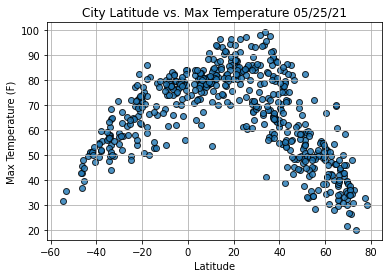

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

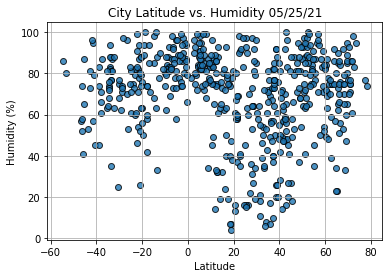

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

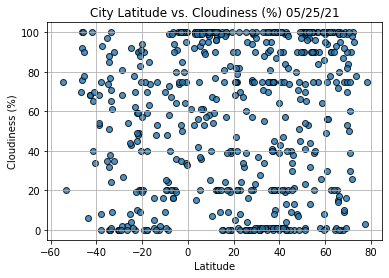

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

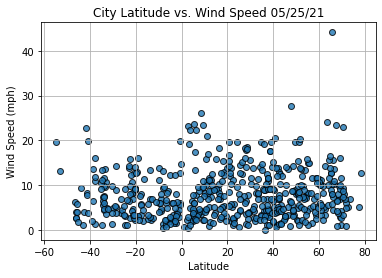

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()